<a href="https://colab.research.google.com/github/wldopie/ESAA/blob/main/OB_4%EC%A1%B0_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(1)_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 라이브러리 임포트 및 데이터 로딩**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/ESAA OB 4조/Project 1/Data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ESAA OB 4조/Project 1/Data/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/ESAA OB 4조/Project 1/Data/sample_submission.csv')

In [ ]:
# 경고 문구 제거
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
# 글꼴 다운로드
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

---

# **2. 데이터 전처리**

## **2.1 데이터 확인**

In [ ]:
train.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


In [ ]:
test.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리
0,0,4167000577042200,5011000435014100,선케어
1,1,1156000009012200,5011000172034400,구강위생용품
2,2,4122000363057300,5011000361097300,캠핑
3,3,5011000436041400,2826000084036400,아웃도어가구
4,4,4150000241065200,5011000169044300,분유/이유식/아기간식


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         31684 non-null  int64 
 1   송하인_격자공간고유번호  31684 non-null  int64 
 2   수하인_격자공간고유번호  31684 non-null  int64 
 3   물품_카테고리       31684 non-null  object
 4   운송장_건수        31684 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         7920 non-null   int64 
 1   송하인_격자공간고유번호  7920 non-null   int64 
 2   수하인_격자공간고유번호  7920 non-null   int64 
 3   물품_카테고리       7920 non-null   object
dtypes: int64(3), object(1)
memory usage: 247.6+ KB


  - `격자공간고유번호` 칼럼은 `수치형`, `물품_카테고리` 칼럼은 `범주형` 변수이며, 결측치는 존재하지 않는다. 

## **2.2 데이터 가공을 위한 전처리**

In [ ]:
# index 칼럼 제거
train.drop('index', axis=1, inplace=True)
test.drop('index', axis=1, inplace=True)

In [ ]:
# 격자공간고유번호는 수치형 변수보다는 범주형 변수가 적합하므로 형변환 진행
train = train.astype({'송하인_격자공간고유번호':'str', '수하인_격자공간고유번호':'str'})
test = test.astype({'송하인_격자공간고유번호':'str', '수하인_격자공간고유번호':'str'})

---

# **3. 데이터 가공**

## **3.1 `물품_카테고리` 변수 정리**
  - 물품_카테고리 변수의 경우, 물품에 대한 수요가 크게 치우쳐져 있음을 확인할 수 있다.
  - 따라서 수요가 가장 많은 상위 10개의 물품을 제외한 나머지 물품은 전부 기타로 묶어준다.

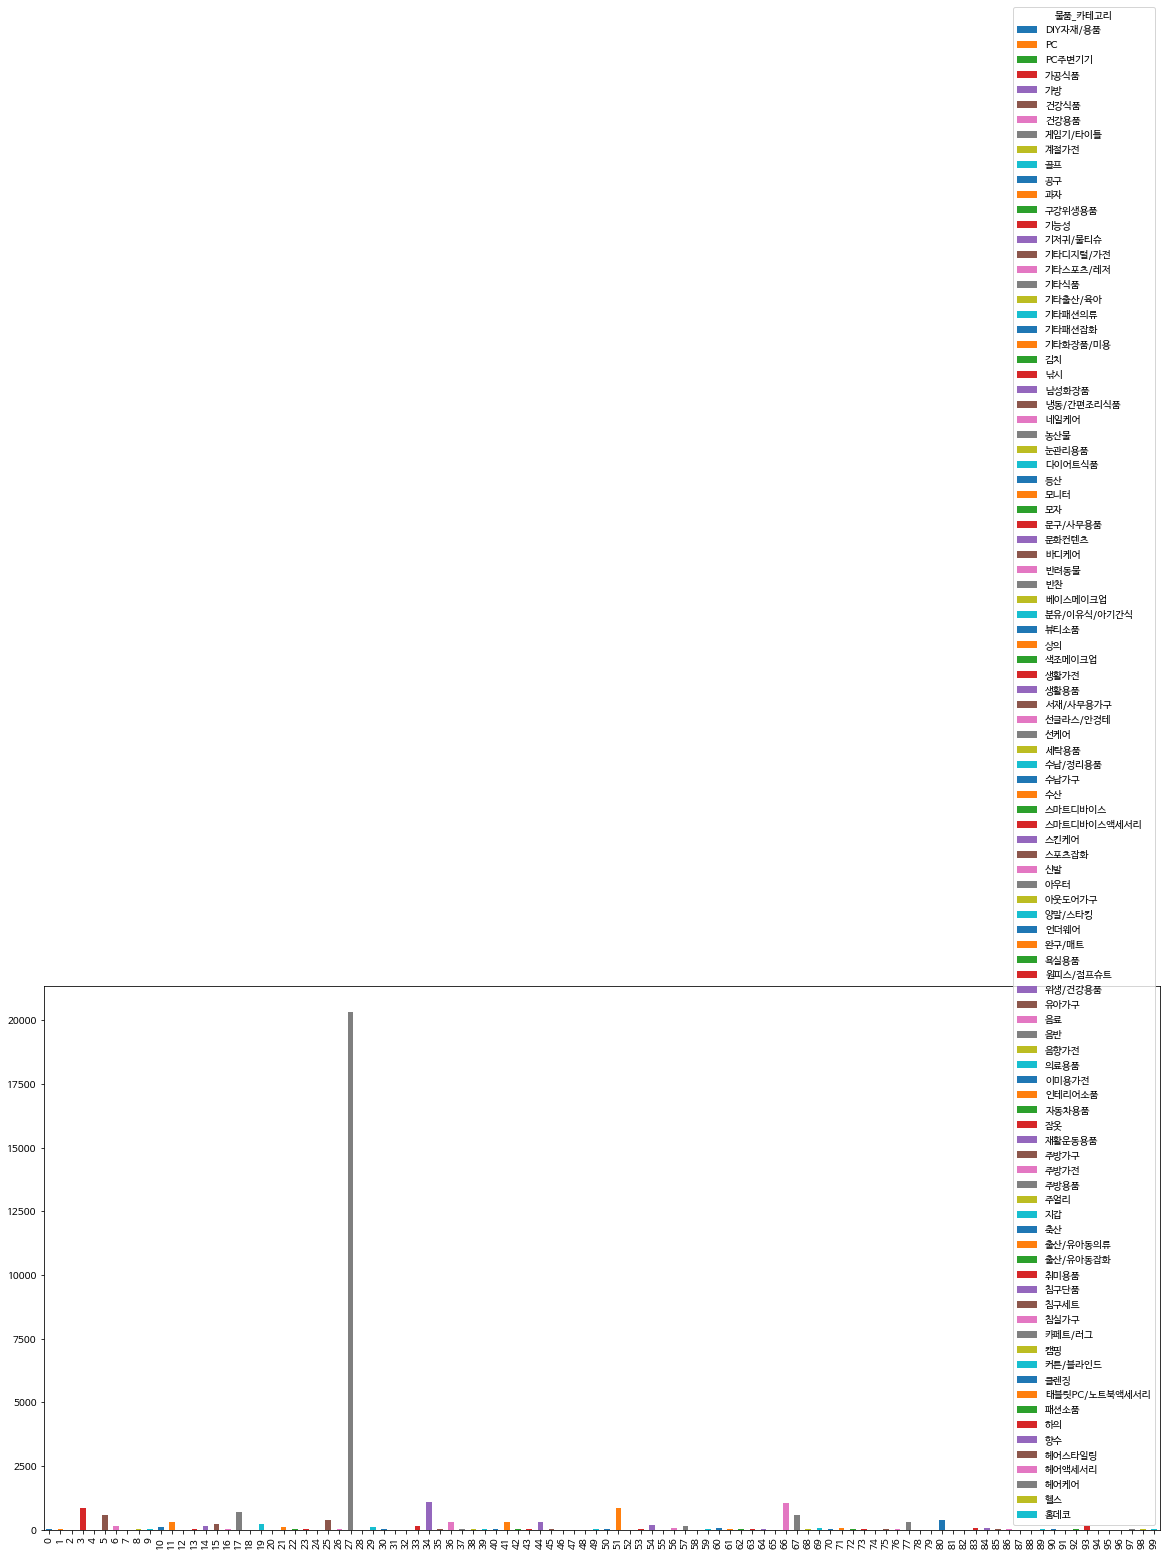

In [ ]:
# 물품 카테고리 칼럼의 분포 확인
train.groupby(['물품_카테고리']).count().reset_index().pivot(columns = '물품_카테고리', values = '운송장_건수').plot.bar(stacked = True, figsize = (20, 10))

In [ ]:
# 유의한 수요가 있는 상위 10개의 물품 선정
train['물품_카테고리'].value_counts()[:10]

농산물          20321
문화컨텐츠         1091
음료            1034
수산             860
가공식품           846
기타식품           698
건강식품           591
음반             576
축산             383
냉동/간편조리식품      375
Name: 물품_카테고리, dtype: int64

In [ ]:
# 상위 10개의 물품을 제외하고 '기타'로 처리
category_list = train['물품_카테고리'].value_counts()[:10]
def func(category):
    if category in category_list:
        return category
    else:
        return '기타'

train['물품_카테고리'] = train['물품_카테고리'].apply(lambda x : func(x))

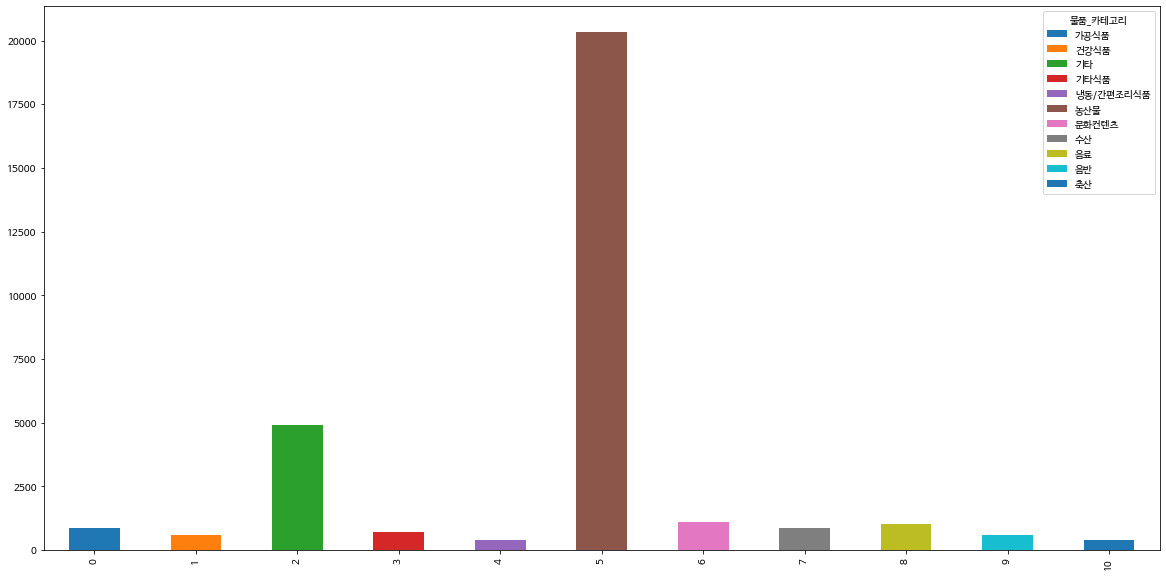

In [ ]:
# 상위 10개의 물품 분포 재확인
train.groupby(['물품_카테고리']).count().reset_index().pivot(columns = '물품_카테고리', values = '운송장_건수').plot.bar(stacked = True, figsize = (20, 10))

## **3.2 격자공간고유번호를 활용한 파생변수 생성**
  - 송하인/수하인 `격자공간고유번호 칼럼`으로부터 `자릿수 별 파생변수 생성`
    - 격자공간고유번호 `1~2자리` : `시도`
    - 격자공간고유번호 `1~5자리` : `시군구`
    - 격자공간고유번호 `1~10자리` : `동`
    - 나머지 4자리 : 기타

  - train, test 데이터를 동시에 가공하기 위해 train, test 데이터를 합치는 과정을 추가한다.

In [ ]:
# target 변수인 운송장_건수를 개별 저장
y_train = train['운송장_건수']
train.drop('운송장_건수', axis=1, inplace=True)

In [ ]:
# train, test 데이터를 한 번에 가공하기 위해 데이터프레임 합치기
data = pd.concat([train, test], ignore_index=True)

In [ ]:
data.head()

,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리
0,5011000595017300,2871000192069300,음반
1,4148000690043300,5011000264024400,문화컨텐츠
2,5011000078068400,1120000007005400,농산물
3,4127100048006400,5011000587019400,기타식품
4,5011000078068400,2823700010076300,농산물


In [ ]:
data.shape      # train(31684) + test(7920) = 총 39604개의 행을 가진 데이터프레임 완성

(39604, 3)

In [ ]:
# 자릿수 별 파생변수 생성
data['송하인_시도'] = data.iloc[:,0].str[:2]
data['송하인_시군구'] = data.iloc[:,0].str[:5]
data['송하인_동'] = data.iloc[:,0].str[:10]
data['송하인_기타'] = data.iloc[:,0].str[10:14]

data['수하인_시도'] = data.iloc[:,1].str[:2]
data['수하인_시군구'] = data.iloc[:,1].str[:5]
data['수하인_동'] = data.iloc[:,1].str[:10]
data['수하인_기타'] = data.iloc[:,1].str[10:14]

In [ ]:
# 송하인_격자공간고유번호, 수하인_격자공간고유번호는 의미없는 칼럼이 되었으므로 제거
data.drop(['송하인_격자공간고유번호','수하인_격자공간고유번호'], axis=1, inplace=True)

## **3.3 `송하인_동`, `수하인_동` 칼럼 가공**
제주도를 제외한 나머지 시도의 동은 00000으로 채우기

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39604 entries, 0 to 39603
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   물품_카테고리  39604 non-null  object
 1   송하인_시도   39604 non-null  object
 2   송하인_시군구  39604 non-null  object
 3   송하인_동    39604 non-null  object
 4   송하인_기타   39604 non-null  object
 5   수하인_시도   39604 non-null  object
 6   수하인_시군구  39604 non-null  object
 7   수하인_동    39604 non-null  object
 8   수하인_기타   39604 non-null  object
dtypes: object(9)
memory usage: 2.7+ MB


In [ ]:
data[data['송하인_시도']=='50']

,물품_카테고리,송하인_시도,송하인_시군구,송하인_동,송하인_기타,수하인_시도,수하인_시군구,수하인_동,수하인_기타
0,음반,50,50110,5011000595,0173,28,28710,2871000192,0693
2,농산물,50,50110,5011000078,0684,11,11200,1120000007,0054
4,농산물,50,50110,5011000078,0684,28,28237,2823700010,0763
5,농산물,50,50130,5013000778,0732,41,41590,4159000114,0164
6,수산,50,50110,5011000316,0243,48,48270,4827000369,0602
...,...,...,...,...,...,...,...,...,...
39597,음반,50,50110,5011000595,0173,11,11650,1165000011,0854
39598,농산물,50,50130,5013000616,0571,27,27260,2726000016,0422
39599,농산물,50,50110,5011000266,0512,46,46230,4623000417,0381
39601,농산물,50,50130,5013000610,0491,11,11470,1147000018,0914


In [ ]:
data = data.astype({'송하인_시도':'str', '수하인_시도':'str'})

In [ ]:
for i in range(len(data)):
    if data['송하인_시도'][i] != '50':
        data['송하인_동'][i] = data['송하인_시군구'][i] + '00000'

    if data['수하인_시도'][i] != '50':
        data['수하인_동'][i] = data['수하인_시군구'][i] + '00000'

In [ ]:
# 올바르게 변경되었는지 확인
data[data['송하인_시도'] != '50']

,물품_카테고리,송하인_시도,송하인_시군구,송하인_동,송하인_기타,수하인_시도,수하인_시군구,수하인_동,수하인_기타
1,문화컨텐츠,41,41480,4148000000,0433,50,50110,5011000264,0244
3,기타식품,41,41271,4127100000,0064,50,50110,5011000587,0194
8,기타,41,41360,4136000000,0941,50,50130,5013000823,0534
12,기타,41,41463,4146300000,0473,50,50110,5011000263,0691
16,기타식품,47,47250,4725000000,0214,50,50110,5011000596,0122
...,...,...,...,...,...,...,...,...,...
39587,주방용품,41,41410,4141000000,0301,50,50110,5011000376,0131
39593,가공식품,41,41360,4136000000,0803,50,50110,5011000199,0022
39596,기타식품,47,47113,4711300000,0334,50,50110,5011000215,0652
39600,문화컨텐츠,11,11545,1154500000,0983,50,50110,5011000264,0551


## **3.4 라벨 인코딩**

In [ ]:
from sklearn.preprocessing import LabelEncoder

### 3.4.1 물품_카테고리

In [ ]:
encoder1 = LabelEncoder()

data['물품_카테고리'] = encoder1.fit_transform(data['물품_카테고리'])

### 3.4.2 시도

In [ ]:
encoder2 = LabelEncoder()

data['송하인_시도'] = encoder2.fit_transform(data['송하인_시도'])
data['수하인_시도'] = encoder2.fit_transform(data['수하인_시도'])

### 3.4.3 시군구

In [ ]:
encoder3 = LabelEncoder()

data['송하인_시군구'] = encoder3.fit_transform(data['송하인_시군구'])
data['수하인_시군구'] = encoder3.fit_transform(data['수하인_시군구'])

### 3.4.4 동

In [ ]:
encoder4 = LabelEncoder()

data['송하인_동'] = encoder4.fit_transform(data['송하인_동'])
data['수하인_동'] = encoder4.fit_transform(data['수하인_동'])

In [ ]:
# 각 칼럼의 데이터타입 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39604 entries, 0 to 39603
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   물품_카테고리  39604 non-null  int64 
 1   송하인_시도   39604 non-null  int64 
 2   송하인_시군구  39604 non-null  int64 
 3   송하인_동    39604 non-null  int64 
 4   송하인_기타   39604 non-null  object
 5   수하인_시도   39604 non-null  int64 
 6   수하인_시군구  39604 non-null  int64 
 7   수하인_동    39604 non-null  int64 
 8   수하인_기타   39604 non-null  object
dtypes: int64(7), object(2)
memory usage: 2.7+ MB


## **3.5 칼럼 삭제**

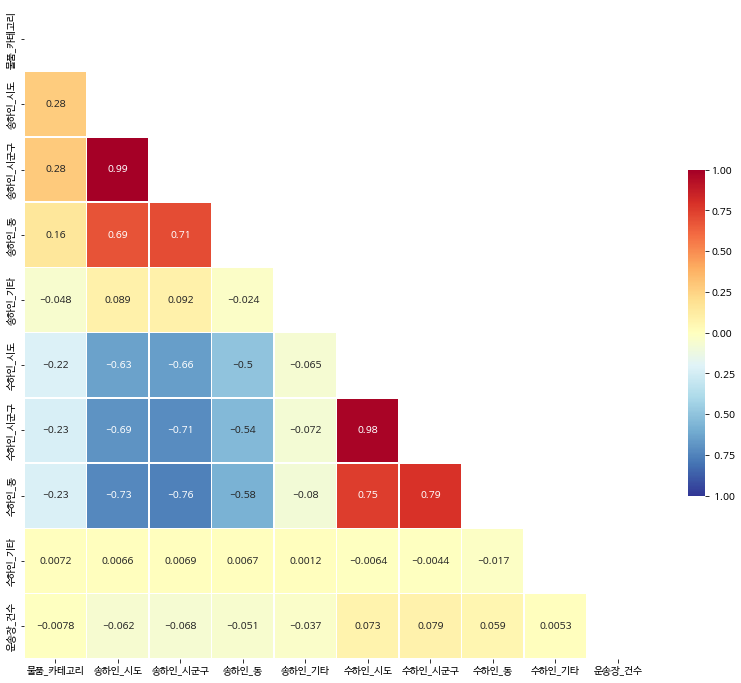

In [ ]:
# 상관계수 확인
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

train_corr = pd.concat([data[:len(train)], y_train], axis=1)
train_corr = train_corr.astype({'송하인_기타':'int', '수하인_기타':'int'})
corr_df = train_corr.corr()

plt.figure(figsize=(14,12))

mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_df, 
            cmap = 'RdYlBu_r',
            annot = True,
            mask=mask,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1)  

plt.show()

In [ ]:
# 기타 칼럼 제거
data.drop(['송하인_기타', '수하인_기타'], axis = 1, inplace = True)

  - 데이터 스케일링을 진행하기에 앞서, CatBoost 모델링을 위한 카테고리형 데이터를 일차적으로 생성한다.

In [ ]:
# 카테고리형 데이터 일차 생성
cat_X_train = data[:len(train)]
cat_y_train = y_train
cat_test = data[len(train):]

## **3.6 데이터 스케일링**
  - `MinMaxScaler`를 활용해 각 데이터들을 `0과 1사이의 값으로 변환`

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

scaler.fit(data)

new_data = scaler.transform(data)

In [ ]:
# 데이터프레임으로 지정
new_data = pd.DataFrame(new_data,columns=data.columns)

In [ ]:
# 데이터 확인
new_data.head()

,물품_카테고리,송하인_시도,송하인_시군구,송하인_동,수하인_시도,수하인_시군구,수하인_동
0,0.68,1.0,0.995816,0.555419,0.1875,0.228,0.055937
1,0.35,0.5,0.439331,0.129310,1.0000,0.996,0.350343
2,0.28,1.0,0.995816,0.294335,0.0000,0.012,0.002944
3,0.18,0.5,0.372385,0.109606,1.0000,0.996,0.534838
4,0.28,1.0,0.995816,0.294335,0.1875,0.216,0.052993


## **3.7 train/test 데이터 분리**

In [ ]:
new_train = new_data[:len(train)]
new_test = new_data[len(train):]

  - 모델링을 위한 데이터 가공이 모두 완료되었다.

# **4. 모델링**

In [ ]:
from sklearn.model_selection import train_test_split
X_train_new, X_val, y_train_new, y_val = train_test_split(new_train, y_train, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVC
from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesRegressor

## **4.1 DecisionTree**

In [ ]:
params = {
    'max_depth' : [2, 3, 4],
    'min_samples_leaf' : [2, 3, 4],
    'min_samples_split' :[2, 3, 4],
    'max_features' : [6, 7, 8],
    'max_leaf_nodes' : [3, 4, 5]
}

dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=params, cv=3, verbose=0, scoring='neg_mean_squared_error')
dt_grid.fit(X_train_new, y_train_new)

print(dt_grid.best_score_)
print(dt_grid.best_params_)

-49.176872754819634
{'max_depth': 2, 'max_features': 7, 'max_leaf_nodes': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
# 최적 파라미터를 이용해 모델 학습
dt = DecisionTreeRegressor(max_depth = 2, max_features = 7, max_leaf_nodes = 4, min_samples_leaf = 2, min_samples_split = 2, random_state=42)
dt.fit(X_train_new, y_train_new)

# RMSE 값 확인
pred_dt = dt.predict(X_val)
sqrt(mean_squared_error(y_val, pred_dt))

5.909727084693495

## **4.2 Random Forest**

In [ ]:
params = {
    'n_estimators' : [100, 200],
    'max_depth' : [6, 8, 10],
    'min_samples_leaf' : [6, 8, 10],
    'min_samples_split' : [15, 20]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid = params, scoring='neg_mean_squared_error',cv=3)
rf_grid.fit(X_train_new, y_train_new)

print(rf_grid.best_score_)
print(rf_grid.best_params_)

-46.81384822154575
{'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 20, 'n_estimators': 200}


In [ ]:
# 최적 파라미터를 이용해 모델 학습
rf = RandomForestRegressor(max_depth = 8, min_samples_leaf = 8, min_samples_split = 20, n_estimators = 200, random_state=42)
rf.fit(X_train_new, y_train_new)

# RMSE 값 확인
pred_rf = rf.predict(X_val)
sqrt(mean_squared_error(y_val, pred_rf))

5.764638769494983

## **4.3 AdaBoost**

In [ ]:
kfold = StratifiedKFold(n_splits=3)
DTC = DecisionTreeRegressor(random_state=42)

params = {
    'loss': ['linear', 'square', 'exponential'],
    'n_estimators': [100],
    'learning_rate': [0.001, 0.5]
}

ada_grid = GridSearchCV(AdaBoostRegressor(random_state=42), param_grid=params, scoring='neg_mean_squared_error', cv=kfold)
ada_grid.fit(X_train_new, y_train_new)

print(ada_grid.best_score_)
print(ada_grid.best_params_)

-49.00777165539466
{'learning_rate': 0.001, 'loss': 'square', 'n_estimators': 100}


In [ ]:
# 최적 파라미터를 이용해 모델 학습
ada = AdaBoostRegressor(learning_rate=0.001, loss='square', n_estimators=100, random_state=42)
ada.fit(X_train_new, y_train_new)

# RMSE 값 확인
pred_ada = ada.predict(X_val)
sqrt(mean_squared_error(y_val, pred_ada))

5.88623093752151

## **4.4 GBM**

In [ ]:
params = {
    'n_estimators' : [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [6, 8],
    'min_samples_leaf': [60, 80]
}

gbm_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid=params, scoring='neg_mean_squared_error', cv=3, verbose=0)
gbm_grid.fit(X_train_new, y_train_new)

print(gbm_grid.best_score_)
print(gbm_grid.best_params_)

-46.869111958808105
{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 80, 'n_estimators': 200}


In [ ]:
# 최적 파라미터를 이용해 모델 학습
gbm = GradientBoostingRegressor(learning_rate=0.1, max_depth=6, min_samples_leaf=80, n_estimators=200, random_state=42)
gbm.fit(X_train_new, y_train_new)

# RMSE 값 확인
pred_gbm = gbm.predict(X_val)
sqrt(mean_squared_error(y_val, pred_gbm))

5.821617684692559

## **4.5 XGBoost**

In [ ]:
# 1. 모든 칼럼을 포함한 데이터를 활용한 모델링
params = {
    'n_estimators': [100, 120],
    'max_depth': [2, 3],
    'eta': [0.05, 0.1] ,
    'eval_set': [(X_train_new,y_train_new), (X_val,y_val)],
}

xgb_grid = GridSearchCV(XGBRegressor(random_state=42, objective='reg:squarederror'), param_grid=params, scoring='neg_mean_squared_error', cv=3, verbose=0)
xgb_grid.fit(X_train_new,y_train_new)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

-47.308027662291266
{'eta': 0.05, 'eval_set': (       물품_카테고리  송하인_시도   송하인_시군구     송하인_동  수하인_시도  수하인_시군구     수하인_동
8781      0.35  0.5000  0.439331  0.129310  1.0000    0.996  0.407262
13599     0.35  0.5000  0.439331  0.129310  1.0000    0.996  0.381747
21131     0.28  1.0000  1.000000  0.859606  0.5000    0.460  0.112856
30727     0.28  1.0000  1.000000  0.793103  0.5000    0.368  0.090285
6664      0.28  0.8125  0.790795  0.232759  1.0000    1.000  0.950932
...        ...     ...       ...       ...     ...      ...       ...
29802     0.28  1.0000  1.000000  0.880542  0.5000    0.468  0.114818
5390      0.28  1.0000  1.000000  0.890394  0.8750    0.816  0.200196
860       0.28  1.0000  1.000000  0.864532  0.5000    0.472  0.115800
15795     0.28  1.0000  0.995816  0.352217  0.3125    0.264  0.064769
23654     0.28  1.0000  0.995816  0.318966  0.0000    0.052  0.012758

[22178 rows x 7 columns], 8781     6
13599    4
21131    3
30727    3
6664     3
        ..
29802    8
5390     

In [ ]:
# 최적 파라미터를 이용해 모델 학습
xgb = XGBRegressor(n_estimators=120, max_depth=2, eta=0.05, eval_set=[(X_train_new,y_train_new), (X_val,y_val)], random_state=42, objective='reg:squarederror')
xgb.fit(X_train_new,y_train_new)

# RMSE 값 계산
pred_xgb = xgb.predict(X_val)
sqrt(mean_squared_error(y_val, pred_xgb))

5.8038585781214485

## **4.6 SVM**

In [ ]:
params = {
    'kernel' : ['linear','poly'],
    'gamma' : [0.05, 0.1]
}

svm_grid = GridSearchCV(SVC(random_state=42), param_grid=params, scoring='neg_mean_squared_error', cv=3, verbose=0)
svm_grid.fit(X_train_new, y_train_new)

print(svm_grid.best_score_)
print(svm_grid.best_params_)

-53.61755752316501
{'gamma': 0.05, 'kernel': 'poly'}


In [ ]:
# 최적 파라미터를 이용해 모델 학습
svm = SVC(kernel='poly', gamma=0.05, random_state=42)
svm.fit(X_train_new, y_train_new)

# RMSE 값 계산
pred_svm = svm.predict(X_val)
sqrt(mean_squared_error(y_val, pred_svm))

6.231144501016813

## **4.7 LightGBM**

In [ ]:
params = {'n_estimators': [200, 300],
          'max_depth': [3, 4],
          'learning_rate': [0.05, 0.07],
          'num_leaves': [7, 8],
          'min_data_in_leaf':[7, 8]
          }

lgbm_grid = GridSearchCV(LGBMRegressor(random_state=42), param_grid=params, cv=3, verbose=0, scoring='neg_mean_squared_error')
lgbm_grid.fit(X_train_new, y_train_new)

print(lgbm_grid.best_params_)
print(lgbm_grid.best_score_)

{'learning_rate': 0.07, 'max_depth': 3, 'min_data_in_leaf': 7, 'n_estimators': 300, 'num_leaves': 8}
-46.41164803126179


In [ ]:
# 최적 파라미터를 이용해 모델 학습
lgbm = LGBMRegressor(learning_rate=0.07, max_depth=3, n_estimators=200, min_data_in_leaf=7, num_leaves=8, random_state=42)
lgbm.fit(X_train_new, y_train_new)

# RMSE 값 확인
pred_lgbm = lgbm.predict(X_val)
sqrt(mean_squared_error(y_val, pred_lgbm))

5.786989214652086

## **4.8 ExtraTrees**

In [ ]:
params = {'max_depth': [None],
          'max_features': [4, 5, 6],
          'min_samples_split': [2, 3],
          'min_samples_leaf': [4, 5, 6],
          'bootstrap': [False],
          'n_estimators': [100, 200, 300]
          }

extc_grid = GridSearchCV(ExtraTreesRegressor(random_state=42), param_grid=params, cv=3, verbose=0, scoring='neg_mean_squared_error')
extc_grid.fit(X_train_new, y_train_new)

print(extc_grid.best_params_)
print(extc_grid.best_score_)

{'bootstrap': False, 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
-46.41899210967216


In [ ]:
# 최적 파라미터를 이용해 모델 학습
extc = ExtraTreesRegressor(bootstrap=False, max_depth=None, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200, random_state=42)
extc.fit(X_train_new, y_train_new)

# RMSE 값 확인
pred_extc = extc.predict(X_val)
sqrt(mean_squared_error(y_val, pred_extc))

5.834539166077323

## **4.9 Catboost**

In [ ]:
# 라이브러리 임포트
!pip install catboost
from catboost import CatBoostRegressor
!pip install optuna
import optuna
from optuna.samplers import TPESampler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 5.0 MB/s 
     |████████████████████████████████| 81 kB 9.6 MB/s 
     |████████████████████████████████| 209 kB 46.8 MB/s 
     |████████████████████████████████| 78 kB 6.9 MB/s 
     |████████████████████████████████| 112 kB 43.9 MB/s 
     |████████████████████████████████| 147 kB 31.3 MB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=a3b164d397a2b0fa6e80bf544032c5133febef702fe7d7a25ed1b51a46d4a9fe
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
  Attempting uninstall: importlib-metadata
    Found 

In [ ]:
# 학습/검증 데이터셋 분리
cat_X_train_new, cat_X_val, cat_y_train_new, cat_y_val = train_test_split(cat_X_train, cat_y_train, test_size = 0.3, random_state = 42)

In [ ]:
# 하이퍼파라미터 튜닝을 위한 함수 정의
def objective(trial):
  param = {
      "random_state":42,
      'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.05),
      'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
      "n_estimators":trial.suggest_int("n_estimators", 500, 5000),
      "max_depth":trial.suggest_int("max_depth", 4, 16),
      'random_strength' :trial.suggest_int('random_strength', 0, 100),
      "colsample_bylevel":trial.suggest_float("colsample_bylevel", 0.4, 1.0),
      "l2_leaf_reg":trial.suggest_float("l2_leaf_reg",1e-8,3e-5),
      "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
      "max_bin": trial.suggest_int("max_bin", 200, 500),
      'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
  }
  train_x, valid_x, train_y, valid_y = train_test_split(cat_X_train, cat_y_train, test_size=0.2)
  cat_features = range(test.shape[1])
  cat = CatBoostRegressor(**param)
  cat.fit(train_x, train_y,
          eval_set=[(train_x, train_y), (valid_x, valid_y)],
          early_stopping_rounds=35,cat_features=cat_features,
          verbose=100)
  cat_pred = cat.predict(valid_x)
  rmse = np.sqrt(mean_squared_error(valid_y, cat_pred))

  return rmse

In [ ]:
# 최적의 파라미터 선정
sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name = 'cat_parameter_opt',
    direction = 'minimize',
    sampler = sampler,
)

study.optimize(objective, n_trials=10)
print("Best Score:",study.best_value)
print("Best trial",study.best_trial.params)

[I 2022-10-13 07:37:11,568] A new study created in memory with name: cat_parameter_opt


0:	learn: 6.8806491	test: 6.8802595	test1: 6.2149033	best: 6.2149033 (0)	total: 59.2ms	remaining: 3m 44s
100:	learn: 6.6052889	test: 6.6447160	test1: 5.9666746	best: 5.9666746 (100)	total: 3.91s	remaining: 2m 22s
200:	learn: 6.4430507	test: 6.5230370	test1: 5.8454823	best: 5.8451154 (199)	total: 7.08s	remaining: 2m 6s
300:	learn: 6.3589497	test: 6.4697302	test1: 5.8124598	best: 5.8124598 (298)	total: 10.3s	remaining: 1m 59s
400:	learn: 6.2872744	test: 6.4375048	test1: 5.7944542	best: 5.7938698 (395)	total: 13.6s	remaining: 1m 55s
500:	learn: 6.2166560	test: 6.4014697	test1: 5.7624167	best: 5.7609028 (496)	total: 17.1s	remaining: 1m 52s
600:	learn: 6.1174314	test: 6.3543284	test1: 5.7275182	best: 5.7275182 (600)	total: 20.8s	remaining: 1m 50s
700:	learn: 5.8762970	test: 6.2781561	test1: 5.6791896	best: 5.6760314 (694)	total: 25.5s	remaining: 1m 52s
Stopped by overfitting detector  (35 iterations wait)

bestTest = 5.625418878
bestIteration = 749

Shrink model to first 750 iterations.


[I 2022-10-13 07:37:43,058] Trial 0 finished with value: 5.625418878461018 and parameters: {'learning_rate': 0.018272261776066247, 'bagging_temperature': 63.512210106407046, 'n_estimators': 3794, 'max_depth': 11, 'random_strength': 15, 'colsample_bylevel': 0.49359671220172163, 'l2_leaf_reg': 1.7519275289243016e-06, 'min_child_samples': 88, 'max_bin': 380, 'od_type': 'IncToDec'}. Best is trial 0 with value: 5.625418878461018.


0:	learn: 6.9268998	test: 6.9265913	test1: 5.9963915	best: 5.9963915 (0)	total: 62.4ms	remaining: 1m 30s
100:	learn: 6.6929361	test: 6.5103534	test1: 5.7282913	best: 5.7282863 (99)	total: 2.51s	remaining: 33.7s
200:	learn: 6.5250964	test: 6.2934603	test1: 5.6449362	best: 5.6448787 (197)	total: 4.44s	remaining: 27.7s
300:	learn: 6.0884147	test: 6.0852969	test1: 5.5136346	best: 5.5136346 (300)	total: 6.13s	remaining: 23.5s
400:	learn: 5.8502604	test: 5.9879258	test1: 5.4727732	best: 5.4723887 (394)	total: 8.1s	remaining: 21.3s


[I 2022-10-13 07:37:53,317] Trial 1 finished with value: 5.464570816443854 and parameters: {'learning_rate': 0.04763628595029446, 'bagging_temperature': 21.368329072358772, 'n_estimators': 1455, 'max_depth': 6, 'random_strength': 18, 'colsample_bylevel': 0.5825453457757226, 'l2_leaf_reg': 1.5747445384650815e-05, 'min_child_samples': 46, 'max_bin': 287, 'od_type': 'IncToDec'}. Best is trial 1 with value: 5.464570816443854.


Stopped by overfitting detector  (35 iterations wait)

bestTest = 5.464570816
bestIteration = 453

Shrink model to first 454 iterations.
0:	learn: 6.3284512	test: 6.3283768	test1: 8.2424606	best: 8.2424606 (0)	total: 11.5ms	remaining: 29.3s
100:	learn: 6.1486295	test: 6.1594130	test1: 8.0800979	best: 8.0800979 (100)	total: 12.1s	remaining: 4m 54s
200:	learn: 6.0259382	test: 6.0355834	test1: 7.9465776	best: 7.9465776 (200)	total: 23s	remaining: 4m 29s
300:	learn: 5.8649329	test: 5.9308449	test1: 7.8339232	best: 7.8339232 (300)	total: 41.7s	remaining: 5m 11s
400:	learn: 5.7888036	test: 5.8674511	test1: 7.7670071	best: 7.7669283 (398)	total: 52s	remaining: 4m 38s
500:	learn: 5.7155938	test: 5.8285143	test1: 7.7203744	best: 7.7203744 (500)	total: 1m 6s	remaining: 4m 32s
600:	learn: 5.6536095	test: 5.8023561	test1: 7.6834386	best: 7.6834173 (595)	total: 1m 18s	remaining: 4m 13s
700:	learn: 5.5354462	test: 5.7516364	test1: 7.6107933	best: 7.6103389 (695)	total: 1m 32s	remaining: 4m 3s
800:	l

[I 2022-10-13 07:42:30,768] Trial 2 finished with value: 7.471337278541073 and parameters: {'learning_rate': 0.016002960978292496, 'bagging_temperature': 0.2920433847181412, 'n_estimators': 2552, 'max_depth': 14, 'random_strength': 20, 'colsample_bylevel': 0.708540663048167, 'l2_leaf_reg': 1.7776512920172654e-05, 'min_child_samples': 9, 'max_bin': 382, 'od_type': 'IncToDec'}. Best is trial 1 with value: 5.464570816443854.


0:	learn: 6.9386507	test: 6.9390130	test1: 5.9631055	best: 5.9631055 (0)	total: 11.6ms	remaining: 48.1s
100:	learn: 6.4928828	test: 6.5092786	test1: 5.6912262	best: 5.6889840 (94)	total: 1.78s	remaining: 1m 11s
200:	learn: 6.3000124	test: 6.3265011	test1: 5.5793553	best: 5.5793553 (200)	total: 3.53s	remaining: 1m 9s
300:	learn: 5.9306711	test: 6.1320575	test1: 5.4900279	best: 5.4894111 (296)	total: 5.9s	remaining: 1m 15s
400:	learn: 5.6051258	test: 5.9601031	test1: 5.4429400	best: 5.4354382 (381)	total: 8.78s	remaining: 1m 21s


[I 2022-10-13 07:42:40,338] Trial 3 finished with value: 5.435438156736948 and parameters: {'learning_rate': 0.04605136717611768, 'bagging_temperature': 72.86653737491046, 'n_estimators': 4138, 'max_depth': 7, 'random_strength': 9, 'colsample_bylevel': 0.8105398159072941, 'l2_leaf_reg': 1.3210173287250643e-05, 'min_child_samples': 16, 'max_bin': 349, 'od_type': 'Iter'}. Best is trial 3 with value: 5.435438156736948.


Stopped by overfitting detector  (35 iterations wait)

bestTest = 5.435438157
bestIteration = 381

Shrink model to first 382 iterations.
0:	learn: 6.6899577	test: 6.6898787	test1: 7.0077350	best: 7.0077350 (0)	total: 32.9ms	remaining: 1m 2s
100:	learn: 6.5450708	test: 6.5695441	test1: 6.9129200	best: 6.9129200 (100)	total: 2.55s	remaining: 45.6s
200:	learn: 6.4828172	test: 6.5141074	test1: 6.8758034	best: 6.8758034 (200)	total: 5.2s	remaining: 44s
300:	learn: 6.4368266	test: 6.4795654	test1: 6.8551304	best: 6.8550195 (299)	total: 7.64s	remaining: 40.7s
400:	learn: 6.3925911	test: 6.4596294	test1: 6.8412938	best: 6.8412938 (400)	total: 9.93s	remaining: 37.2s
500:	learn: 6.3632557	test: 6.4334884	test1: 6.8262790	best: 6.8262790 (500)	total: 11.8s	remaining: 33s
600:	learn: 6.2996102	test: 6.4078708	test1: 6.8098064	best: 6.8098064 (600)	total: 14.1s	remaining: 30.6s
700:	learn: 6.2538999	test: 6.3884016	test1: 6.7985113	best: 6.7982999 (699)	total: 16.4s	remaining: 28.1s
800:	learn: 6.1

[I 2022-10-13 07:43:21,461] Trial 4 finished with value: 6.5939005059015345 and parameters: {'learning_rate': 0.015166293102182283, 'bagging_temperature': 4.467752817973908, 'n_estimators': 1903, 'max_depth': 10, 'random_strength': 55, 'colsample_bylevel': 0.5109126733153162, 'l2_leaf_reg': 2.9087842986659113e-05, 'min_child_samples': 79, 'max_bin': 482, 'od_type': 'IncToDec'}. Best is trial 3 with value: 5.435438156736948.


0:	learn: 6.8439729	test: 6.8436122	test1: 6.3670481	best: 6.3670481 (0)	total: 24.1ms	remaining: 33.3s
100:	learn: 6.7413854	test: 6.7270900	test1: 6.2572079	best: 6.2572079 (100)	total: 2.3s	remaining: 29.2s
200:	learn: 6.6716666	test: 6.6669851	test1: 6.2174338	best: 6.2174338 (200)	total: 5.03s	remaining: 29.5s
300:	learn: 6.5722988	test: 6.5773464	test1: 6.1453373	best: 6.1453373 (300)	total: 8.01s	remaining: 28.8s
400:	learn: 6.2354429	test: 6.2738623	test1: 5.8768509	best: 5.8736704 (393)	total: 11.2s	remaining: 27.4s
500:	learn: 6.1009532	test: 6.1552900	test1: 5.8235261	best: 5.8235261 (500)	total: 13.1s	remaining: 23s
Stopped by overfitting detector  (35 iterations wait)

bestTest = 5.803388983
bestIteration = 547

Shrink model to first 548 iterations.


[I 2022-10-13 07:43:37,884] Trial 5 finished with value: 5.803388982710755 and parameters: {'learning_rate': 0.04409226795827594, 'bagging_temperature': 0.022592797420156956, 'n_estimators': 1382, 'max_depth': 4, 'random_strength': 32, 'colsample_bylevel': 0.6332063738136893, 'l2_leaf_reg': 8.147757462899138e-06, 'min_child_samples': 84, 'max_bin': 307, 'od_type': 'Iter'}. Best is trial 3 with value: 5.435438156736948.


0:	learn: 6.8621836	test: 6.8604273	test1: 6.2986099	best: 6.2986099 (0)	total: 1.45s	remaining: 20m 11s
100:	learn: 6.7381492	test: 6.7273284	test1: 6.1971712	best: 6.1971712 (100)	total: 39.4s	remaining: 4m 46s
200:	learn: 6.6624436	test: 6.6446963	test1: 6.1443541	best: 6.1443174 (196)	total: 1m 2s	remaining: 3m 17s
300:	learn: 6.5913652	test: 6.5811101	test1: 6.1205461	best: 6.1205461 (300)	total: 1m 41s	remaining: 3m
400:	learn: 6.5128349	test: 6.5259288	test1: 6.1026181	best: 6.1026181 (400)	total: 2m 8s	remaining: 2m 19s
500:	learn: 6.4314296	test: 6.4529869	test1: 6.0875597	best: 6.0865433 (486)	total: 2m 28s	remaining: 1m 38s
600:	learn: 6.3968562	test: 6.4285669	test1: 6.0835957	best: 6.0812929 (591)	total: 2m 51s	remaining: 1m 6s
Stopped by overfitting detector  (35 iterations wait)

bestTest = 6.081292863
bestIteration = 591

Shrink model to first 592 iterations.


[I 2022-10-13 07:46:38,860] Trial 6 finished with value: 6.0812928627158245 and parameters: {'learning_rate': 0.012545899554294089, 'bagging_temperature': 16.172900811143155, 'n_estimators': 835, 'max_depth': 16, 'random_strength': 77, 'colsample_bylevel': 0.5192294089205034, 'l2_leaf_reg': 1.7560829253683595e-07, 'min_child_samples': 83, 'max_bin': 412, 'od_type': 'Iter'}. Best is trial 3 with value: 5.435438156736948.


0:	learn: 7.1457927	test: 7.1457227	test1: 4.8907008	best: 4.8907008 (0)	total: 15.8ms	remaining: 16.1s
100:	learn: 7.0197518	test: 6.9943091	test1: 4.8043113	best: 4.8043113 (100)	total: 11s	remaining: 1m 39s
200:	learn: 6.9379149	test: 6.9006121	test1: 4.7691232	best: 4.7690510 (199)	total: 24.9s	remaining: 1m 41s
300:	learn: 6.8503148	test: 6.8312685	test1: 4.7567056	best: 4.7566989 (298)	total: 40.3s	remaining: 1m 36s
400:	learn: 6.7673590	test: 6.7629429	test1: 4.7471728	best: 4.7471728 (400)	total: 53.9s	remaining: 1m 23s
500:	learn: 6.6663909	test: 6.7075652	test1: 4.7410623	best: 4.7410623 (499)	total: 1m 8s	remaining: 1m 10s
Stopped by overfitting detector  (35 iterations wait)

bestTest = 4.7407833
bestIteration = 503

Shrink model to first 504 iterations.


[I 2022-10-13 07:47:55,036] Trial 7 finished with value: 4.740783300154832 and parameters: {'learning_rate': 0.011265617213006592, 'bagging_temperature': 0.27155819552829413, 'n_estimators': 1021, 'max_depth': 15, 'random_strength': 62, 'colsample_bylevel': 0.5985388149115896, 'l2_leaf_reg': 1.9161149250778487e-06, 'min_child_samples': 34, 'max_bin': 297, 'od_type': 'IncToDec'}. Best is trial 7 with value: 4.740783300154832.


0:	learn: 6.2759035	test: 6.2749401	test1: 8.3852320	best: 8.3852320 (0)	total: 24.7ms	remaining: 25.6s
100:	learn: 6.1076440	test: 6.1126552	test1: 8.2581291	best: 8.2581291 (99)	total: 6.35s	remaining: 58.9s
200:	learn: 6.0455452	test: 6.0729081	test1: 8.2292201	best: 8.2292106 (199)	total: 11.8s	remaining: 49.1s
300:	learn: 5.9618768	test: 6.0221350	test1: 8.1273377	best: 8.1273377 (300)	total: 17.6s	remaining: 43s
400:	learn: 5.2201331	test: 5.7280558	test1: 7.7355272	best: 7.7311670 (398)	total: 35.8s	remaining: 56.8s
Stopped by overfitting detector  (35 iterations wait)

bestTest = 7.729860854
bestIteration = 407

Shrink model to first 408 iterations.


[I 2022-10-13 07:48:40,915] Trial 8 finished with value: 7.72986085353798 and parameters: {'learning_rate': 0.04169990777997927, 'bagging_temperature': 0.7742116473996251, 'n_estimators': 1038, 'max_depth': 13, 'random_strength': 76, 'colsample_bylevel': 0.7367663185416977, 'l2_leaf_reg': 2.3131305726837285e-05, 'min_child_samples': 52, 'max_bin': 357, 'od_type': 'IncToDec'}. Best is trial 7 with value: 4.740783300154832.


0:	learn: 6.5358658	test: 6.5336787	test1: 7.5584965	best: 7.5584965 (0)	total: 30.4ms	remaining: 1m 42s
100:	learn: 6.4399708	test: 6.4287564	test1: 7.4830776	best: 7.4830776 (100)	total: 1.98s	remaining: 1m 4s
200:	learn: 6.3904594	test: 6.3712301	test1: 7.4407336	best: 7.4407336 (200)	total: 4.03s	remaining: 1m 3s
300:	learn: 6.3622046	test: 6.3425930	test1: 7.4244675	best: 7.4244675 (300)	total: 6.02s	remaining: 1m 1s
400:	learn: 6.3316602	test: 6.3070487	test1: 7.3918606	best: 7.3918606 (400)	total: 8.2s	remaining: 1m
500:	learn: 6.3000571	test: 6.2600810	test1: 7.3401926	best: 7.3401926 (500)	total: 10.2s	remaining: 58.4s
600:	learn: 6.2826422	test: 6.2434787	test1: 7.3235475	best: 7.3235475 (600)	total: 12.1s	remaining: 55.4s
700:	learn: 6.2598864	test: 6.2163352	test1: 7.2947594	best: 7.2947594 (700)	total: 14.1s	remaining: 53.6s
800:	learn: 6.2369755	test: 6.1944590	test1: 7.2691710	best: 7.2691710 (800)	total: 16.2s	remaining: 51.8s
900:	learn: 6.2015404	test: 6.1561193	test1

[I 2022-10-13 07:49:40,600] Trial 9 finished with value: 6.64304822312614 and parameters: {'learning_rate': 0.011896326393433528, 'bagging_temperature': 0.0133572404119741, 'n_estimators': 3364, 'max_depth': 8, 'random_strength': 51, 'colsample_bylevel': 0.9445398843556558, 'l2_leaf_reg': 7.486273952174759e-06, 'min_child_samples': 44, 'max_bin': 427, 'od_type': 'IncToDec'}. Best is trial 7 with value: 4.740783300154832.


Best Score: 4.740783300154832
Best trial {'learning_rate': 0.011265617213006592, 'bagging_temperature': 0.27155819552829413, 'n_estimators': 1021, 'max_depth': 15, 'random_strength': 62, 'colsample_bylevel': 0.5985388149115896, 'l2_leaf_reg': 1.9161149250778487e-06, 'min_child_samples': 34, 'max_bin': 297, 'od_type': 'IncToDec'}


In [ ]:
# 최적 파라미터를 활용한 모델 학습
cat_reg = CatBoostRegressor(
              learning_rate = 0.011265617213006592, 
              bagging_temperature = 0.27155819552829413, 
              n_estimators = 1021, 
              max_depth = 15, 
              random_strength = 62, 
              colsample_bylevel = 0.5985388149115896, 
              l2_leaf_reg = 1.9161149250778487e-06, 
              min_child_samples = 34, 
              max_bin = 297, 
              od_type = 'IncToDec')
cat_reg.fit(cat_X_train_new, cat_y_train_new)

0:	learn: 7.0688745	total: 1.35s	remaining: 22m 55s
1:	learn: 7.0677464	total: 1.6s	remaining: 13m 34s
2:	learn: 7.0670094	total: 2.64s	remaining: 14m 55s
3:	learn: 7.0659723	total: 3.84s	remaining: 16m 15s
4:	learn: 7.0642354	total: 4.76s	remaining: 16m 7s
5:	learn: 7.0631587	total: 5.82s	remaining: 16m 24s
6:	learn: 7.0612897	total: 6.78s	remaining: 16m 21s
7:	learn: 7.0599288	total: 7.63s	remaining: 16m 5s
8:	learn: 7.0588355	total: 9.18s	remaining: 17m 12s
9:	learn: 7.0574285	total: 9.26s	remaining: 15m 36s
10:	learn: 7.0560485	total: 9.66s	remaining: 14m 47s
11:	learn: 7.0544829	total: 11.1s	remaining: 15m 31s
12:	learn: 7.0527924	total: 13.1s	remaining: 16m 54s
13:	learn: 7.0520839	total: 13.3s	remaining: 15m 59s
14:	learn: 7.0511440	total: 13.7s	remaining: 15m 18s
15:	learn: 7.0499019	total: 15.3s	remaining: 15m 59s
16:	learn: 7.0485245	total: 16.1s	remaining: 15m 51s
17:	learn: 7.0477809	total: 16.1s	remaining: 14m 58s
18:	learn: 7.0469144	total: 16.2s	remaining: 14m 12s
19:	le

In [ ]:
# RMSE 값 확인
pred_cat = cat_reg.predict(cat_X_val)
sqrt(mean_squared_error(cat_y_val, pred_cat))

5.84037039707564

## **4.10 KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# 파라미터 설정
grid_params = {'n_neighbors' : [5, 7, 9, 11, 13, 15],
               'weights' : ['uniform', 'distance'],
               'metric' : ['minkowski', 'euclidean', 'manhattan']
               }

# GridSearchCV를 이용해 하이퍼파라미터 튜닝 진행
gs = GridSearchCV(KNeighborsRegressor(), grid_params, verbose = 1, cv = 5, n_jobs = -1)

In [ ]:
# KNeighborsRegressor 모델 적합
g_res = gs.fit(X_train_new, y_train_new)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
# 최적 모델 점수 확인
g_res.best_score_

0.001387728258768406

In [ ]:
# 최적 파라미터 확인
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}

In [ ]:
# 최적 파라미터를 활용한 KNeighborsRegressor 모델 적합
knn_reg = KNeighborsRegressor(metric = 'manhattan', n_neighbors = 15, weights = 'uniform')
knn_reg.fit(X_train_new, y_train_new)

# RMSE 값 확인
pred_knn = knn_reg.predict(X_val)
sqrt(mean_squared_error(y_val, pred_knn))

6.062271088282986

## **4.11 Voting Regressor**

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
#상위 3개
voting_reg = VotingRegressor(
    estimators=[('rf_reg', rf),
                ('lgbm_reg', lgbm), 
                ('xgb_reg', xgb)
                ])

voting_reg.fit(X_train_new, y_train_new)

pred_voting = voting_reg.predict(X_val)
sqrt(mean_squared_error(y_val, pred_voting))

5.765578738783059

In [ ]:
#상위 4개
voting_reg = VotingRegressor(
    estimators=[('rf_reg', rf),
                ('lgbm_reg', lgbm), 
                ('xgb_reg', xgb),
                ('gbm_reg', gbm)
                ])

voting_reg.fit(X_train_new, y_train_new)

pred_voting = voting_reg.predict(X_val)
sqrt(mean_squared_error(y_val, pred_voting))

5.766925285325311

In [ ]:
#상위 5개
voting_reg = VotingRegressor(
    estimators=[('rf_reg', rf),
                ('lgbm_reg', lgbm), 
                ('xgb_reg', xgb),
                ('gbm_reg', gbm),
                ('extc_reg',extc)
                ])

voting_reg.fit(X_train_new, y_train_new)

pred_voting = voting_reg.predict(X_val)
sqrt(mean_squared_error(y_val, pred_voting))

5.764661677157243

In [ ]:
#상위 7개
voting_reg = VotingRegressor(
    estimators=[('rf_reg', rf),
                ('lgbm_reg', lgbm), 
                ('xgb_reg', xgb),
                ('gbm_reg', gbm),
                ('extc_reg',extc),
                ('cat_reg', cat_reg),
                ('ada_reg', ada)
                ])

voting_reg.fit(X_train_new, y_train_new)

pred_voting = voting_reg.predict(X_val)
sqrt(mean_squared_error(y_val, pred_voting))

0:	learn: 7.0688745	total: 472ms	remaining: 8m 1s
1:	learn: 7.0677464	total: 538ms	remaining: 4m 34s
2:	learn: 7.0670094	total: 975ms	remaining: 5m 30s
3:	learn: 7.0659723	total: 1.38s	remaining: 5m 51s
4:	learn: 7.0642354	total: 1.76s	remaining: 5m 57s
5:	learn: 7.0631587	total: 2.23s	remaining: 6m 17s
6:	learn: 7.0612897	total: 2.58s	remaining: 6m 13s
7:	learn: 7.0599288	total: 2.87s	remaining: 6m 3s
8:	learn: 7.0588355	total: 3.41s	remaining: 6m 23s
9:	learn: 7.0574285	total: 3.44s	remaining: 5m 47s
10:	learn: 7.0560485	total: 3.59s	remaining: 5m 29s
11:	learn: 7.0544829	total: 4.1s	remaining: 5m 44s
12:	learn: 7.0527924	total: 5.25s	remaining: 6m 47s
13:	learn: 7.0520839	total: 5.34s	remaining: 6m 23s
14:	learn: 7.0511440	total: 5.47s	remaining: 6m 6s
15:	learn: 7.0499019	total: 5.97s	remaining: 6m 15s
16:	learn: 7.0485245	total: 6.24s	remaining: 6m 8s
17:	learn: 7.0477809	total: 6.25s	remaining: 5m 48s
18:	learn: 7.0469144	total: 6.25s	remaining: 5m 29s
19:	learn: 7.0457432	total:

5.767981269578191

## **4.12 Stacking Model**

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
#상위 3개
stack_models = [('rf_reg', rf),
                ('lgbm_reg', lgbm), 
                ('xgb_reg', xgb)
                ]

stack = StackingRegressor(stack_models, final_estimator=xgb)
stack.fit(X_train_new, y_train_new)
pred_stack = stack.predict(X_val)
sqrt(mean_squared_error(y_val, pred_stack))

5.7562967806404135

In [ ]:
#상위 4개
stack_models = [('rf_reg', rf),
                ('lgbm_reg', lgbm), 
                ('xgb_reg', xgb),
                ('gbm_reg', gbm)
                ]

stack = StackingRegressor(stack_models, final_estimator=xgb)
stack.fit(X_train_new, y_train_new)
pred_stack = stack.predict(X_val)
sqrt(mean_squared_error(y_val, pred_stack))

5.803833480751177

In [ ]:
#상위 5개
stack_models = [('rf_reg', rf),
                ('lgbm_reg', lgbm), 
                ('xgb_reg', xgb),
                ('gbm_reg', gbm),
                ('extc_reg',extc)
                ]

stack = StackingRegressor(stack_models, final_estimator=xgb)
stack.fit(X_train_new, y_train_new)
pred_stack = stack.predict(X_val)
sqrt(mean_squared_error(y_val, pred_stack))

5.783011243381748

In [ ]:
#상위 7개
stack_models = [('rf_reg', rf),
                ('lgbm_reg', lgbm), 
                ('xgb_reg', xgb),
                ('gbm_reg', gbm),
                ('extc_reg',extc),
                ('cat_reg', cat_reg),
                ('ada_reg', ada)
                ]

stack = StackingRegressor(stack_models, final_estimator=xgb)
stack.fit(X_train_new, y_train_new)
pred_stack = stack.predict(X_val)
sqrt(mean_squared_error(y_val, pred_stack))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
105:	learn: 6.9310163	total: 35.6s	remaining: 5m 6s
106:	learn: 6.9307059	total: 35.9s	remaining: 5m 6s
107:	learn: 6.9300657	total: 36.4s	remaining: 5m 7s
108:	learn: 6.9298630	total: 36.9s	remaining: 5m 8s
109:	learn: 6.9289623	total: 37.3s	remaining: 5m 8s
110:	learn: 6.9284313	total: 37.6s	remaining: 5m 8s
111:	learn: 6.9281398	total: 38s	remaining: 5m 8s
112:	learn: 6.9277963	total: 38.4s	remaining: 5m 8s
113:	learn: 6.9272854	total: 39s	remaining: 5m 10s
114:	learn: 6.9269297	total: 39.3s	remaining: 5m 9s
115:	learn: 6.9266024	total: 39.8s	remaining: 5m 10s
116:	learn: 6.9260131	total: 40.2s	remaining: 5m 10s
117:	learn: 6.9250080	total: 40.5s	remaining: 5m 9s
118:	learn: 6.9247934	total: 40.6s	remaining: 5m 7s
119:	learn: 6.9244118	total: 41s	remaining: 5m 7s
120:	learn: 6.9241742	total: 41s	remaining: 5m 5s
121:	learn: 6.9233172	total: 41.5s	remaining: 5m 5s
122:	learn: 6.9232271	total: 41.5s	remaining: 5m 2s
123:	learn: 6.9228452	total: 41.9

5.76681259166249

# **5. 제출파일 생성**

In [ ]:
# DecisionTree
dt.fit(X_train_new, y_train_new)
pred_dt_final = dt.predict(new_test)
submission['운송장_건수'] = pred_dt_final
submission.to_csv('submission_dt_final.csv',index=False)

In [ ]:
# RandomForest
rf.fit(X_train_new, y_train_new)
pred_rf_final = rf.predict(new_test)
submission['운송장_건수'] = pred_rf_final
submission.to_csv('submission_rf_final.csv',index=False)

In [ ]:
# AdaBoost
ada.fit(X_train_new, y_train_new)
pred_ada_final = ada.predict(new_test)
submission['운송장_건수'] = pred_ada_final
submission.to_csv('submission_ada_final.csv',index=False)

In [ ]:
# GBM
gbm.fit(X_train_new, y_train_new)
pred_gbm_final = gbm.predict(new_test)
submission['운송장_건수'] = pred_gbm_final
submission.to_csv('submission_gbm_final.csv',index=False)

In [ ]:
# XGBoost
xgb.fit(X_train_new, y_train_new)
pred_xgb_final = xgb.predict(new_test)
submission['운송장_건수'] = pred_xgb_final
submission.to_csv('submission_xgb_final.csv',index=False)

In [ ]:
# SVM
svm.fit(X_train_new, y_train_new)
pred_svm_final = svm.predict(new_test)
submission['운송장_건수'] = pred_svm_final
submission.to_csv('submission_svm_final.csv',index=False)

In [ ]:
# LightGBM
lgbm.fit(X_train_new, y_train_new)
pred_lgbm_final = lgbm.predict(new_test)
submission['운송장_건수'] = pred_lgbm_final
submission.to_csv('submission_lgbm_final.csv',index=False)

In [ ]:
# ExtraTrees
extc.fit(X_train_new, y_train_new)
pred_extc_final = extc.predict(new_test)
submission['운송장_건수'] = pred_extc_final
submission.to_csv('submission_extc_final.csv',index=False)

In [ ]:
# CatBoost
cat_reg.fit(X_train_new, y_train_new)
pred_cat_final = cat_reg.predict(new_test)
submission['운송장_건수'] = pred_cat_final
submission.to_csv('submission_cat_final.csv',index=False)

0:	learn: 7.0688745	total: 624ms	remaining: 10m 36s
1:	learn: 7.0677464	total: 687ms	remaining: 5m 49s
2:	learn: 7.0670094	total: 1.15s	remaining: 6m 29s
3:	learn: 7.0659723	total: 1.58s	remaining: 6m 41s
4:	learn: 7.0642354	total: 1.94s	remaining: 6m 34s
5:	learn: 7.0631587	total: 2.42s	remaining: 6m 49s
6:	learn: 7.0612897	total: 2.81s	remaining: 6m 46s
7:	learn: 7.0599288	total: 3.37s	remaining: 7m 6s
8:	learn: 7.0588355	total: 4.36s	remaining: 8m 9s
9:	learn: 7.0574285	total: 4.41s	remaining: 7m 26s
10:	learn: 7.0560485	total: 4.83s	remaining: 7m 23s
11:	learn: 7.0544829	total: 5.83s	remaining: 8m 10s
12:	learn: 7.0527924	total: 6.83s	remaining: 8m 49s
13:	learn: 7.0520839	total: 7.01s	remaining: 8m 23s
14:	learn: 7.0511440	total: 7.14s	remaining: 7m 58s
15:	learn: 7.0499019	total: 7.66s	remaining: 8m
16:	learn: 7.0485245	total: 7.92s	remaining: 7m 47s
17:	learn: 7.0477809	total: 7.92s	remaining: 7m 21s
18:	learn: 7.0469144	total: 7.93s	remaining: 6m 58s
19:	learn: 7.0457432	total:

In [ ]:
# KNN
knn_reg.fit(X_train_new, y_train_new)
pred_knn_final = knn_reg.predict(new_test)
submission['운송장_건수'] = pred_knn_final
submission.to_csv('submission_knn_final.csv',index=False)

In [ ]:
# Voting Regressor
voting_reg = VotingRegressor(
    estimators=[('rf_reg', rf),
                ('lgbm_reg', lgbm), 
                ('xgb_reg', xgb),
                ('gbm_reg', gbm),
                ('extc_reg',extc)
                ])

voting_reg.fit(X_train_new, y_train_new)
pred_voting_final = voting_reg.predict(new_test)
submission['운송장_건수'] = pred_voting_final
submission.to_csv('submission_voting_final.csv',index=False)

In [ ]:
# Stacking Model
stack_models = [('rf_reg', rf),
                ('lgbm_reg', lgbm), 
                ('xgb_reg', xgb)
                ]

stack = StackingRegressor(stack_models, final_estimator=xgb)
stack.fit(X_train_new, y_train_new)
pred_stacking_final = stack.predict(new_test)
submission['운송장_건수'] = pred_stacking_final
submission.to_csv('submission_stacking_final.csv',index=False)

  - RMSE값이 가장 작은 XGBoost 모델링을 최종 모델로 결정하였다.

In [ ]:
# 최종 제출 파일
submission['운송장_건수'] = pred_xgb_final
submission.to_csv('submission_final.csv',index=False)